### Insurance cost analysis

In [1173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score, train_test_split
from sklearn.pipeline import Pipeline

## List of contents 
- [Introduction](#Introduction)
- [Changing data types](#Changing-data-types)
- [Converting categorical variables](#Converting-categorical-variables)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Spliting data into train and test sets](#Spliting-data-into-train-and-test-sets)
- [Checking for duplicates](#Checking-for-duplicates)
- [Replacing missing values](#Replacing-missing-values)
- [Data scalling](#Data-scalling)
- [Test set analysis](#Test-set-analysis)
- [Model development - linear regression](#Model-development---linear-regression)
- [Model development - polynomial transformation](#Model-development---polynomial-transformation)
- [Pipeline](#Pipeline)
- [Conclusions](#Conclusions:)

# Introduction

The goal of this analysis is to apply various factors to predict insurance charges and build a model to estimate the amount of these charges.
The dataset contains the following columns: 
- age,
- gender,
- bmi,
- number of children,
- information if a person is a smoker
- region,
- charges.


In [1175]:
df = pd.read_csv("C://Workspace//insurance_cost _analysis//insurance.csv")
df.head()

,19,Male,27.9,0,No,SW,16884.924
0,18,Female,33.770,1,Yes,SE,1725.55230
1,28,Female,33.000,3,Yes,SE,4449.46200
2,33,Female,22.705,0,Yes,NW,21984.47061
3,32,Female,28.880,0,Yes,NW,3866.85520
4,31,Male,25.740,0,?,SE,3756.62160


In [1176]:
headers = ["Age", "Gender", "BMI", "No_of_children", "Smoker", "Region", "Charges"]
df.columns = headers
df.head(10)

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges
0,18,Female,33.770,1,Yes,SE,1725.55230
1,28,Female,33.000,3,Yes,SE,4449.46200
2,33,Female,22.705,0,Yes,NW,21984.47061
3,32,Female,28.880,0,Yes,NW,3866.85520
4,31,Male,25.740,0,?,SE,3756.62160
5,46,Male,33.440,1,Yes,SE,8240.58960
6,37,Male,27.740,3,Yes,NW,7281.50560
7,37,Female,29.830,2,Yes,NE,6406.41070
8,60,Male,25.840,0,Yes,NW,28923.13692
9,25,Female,26.220,0,Yes,NE,2721.32080


Replacing "?" in dataset cells with NaN using pandas.

In [1180]:
df.replace("?", np.NaN, inplace=True)

In [1181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   object 
 2   BMI             2771 non-null   float64
 3   No_of_children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   object 
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 151.7+ KB


 Checking the count of missing values in each column.

In [1183]:
df.isna().sum()

Age               4
Gender            0
BMI               0
No_of_children    0
Smoker            7
Region            0
Charges           0
dtype: int64

## Changing data types

In [1188]:
df["Age"] = df["Age"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   float64
 1   Gender          2771 non-null   object 
 2   BMI             2771 non-null   float64
 3   No_of_children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   object 
 6   Charges         2771 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 151.7+ KB


## Converting categorical variables 

In [1191]:
gender_1 = pd.get_dummies(df["Gender"], dtype='int')
df = pd.concat([df, gender_1], axis=1)
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges,Female,Male
0,18.0,Female,33.770,1,Yes,SE,1725.55230,1,0
1,28.0,Female,33.000,3,Yes,SE,4449.46200,1,0
2,33.0,Female,22.705,0,Yes,NW,21984.47061,1,0
3,32.0,Female,28.880,0,Yes,NW,3866.85520,1,0
4,31.0,Male,25.740,0,NaN,SE,3756.62160,0,1


In [1193]:
smoker_1 = pd.get_dummies(df["Smoker"], dtype="int")
df = pd.concat([df, smoker_1], axis=1)
region_1 = pd.get_dummies(df["Region"], dtype="int")
df = pd.concat([df, region_1], axis=1)
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges,Female,Male,No,Yes,NE,NW,SE,SW
0,18.0,Female,33.770,1,Yes,SE,1725.55230,1,0,0,1,0,0,1,0
1,28.0,Female,33.000,3,Yes,SE,4449.46200,1,0,0,1,0,0,1,0
2,33.0,Female,22.705,0,Yes,NW,21984.47061,1,0,0,1,0,1,0,0
3,32.0,Female,28.880,0,Yes,NW,3866.85520,1,0,0,1,0,1,0,0
4,31.0,Male,25.740,0,NaN,SE,3756.62160,0,1,0,0,0,0,1,0


In [1195]:
df.rename(columns={"No":"No_smoker",
                  "Yes": "Yes_smoker"}, inplace=True)
df.head()

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges,Female,Male,No_smoker,Yes_smoker,NE,NW,SE,SW
0,18.0,Female,33.770,1,Yes,SE,1725.55230,1,0,0,1,0,0,1,0
1,28.0,Female,33.000,3,Yes,SE,4449.46200,1,0,0,1,0,0,1,0
2,33.0,Female,22.705,0,Yes,NW,21984.47061,1,0,0,1,0,1,0,0
3,32.0,Female,28.880,0,Yes,NW,3866.85520,1,0,0,1,0,1,0,0
4,31.0,Male,25.740,0,NaN,SE,3756.62160,0,1,0,0,0,0,1,0


In [1197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   float64
 1   Gender          2771 non-null   object 
 2   BMI             2771 non-null   float64
 3   No_of_children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   object 
 6   Charges         2771 non-null   float64
 7   Female          2771 non-null   int32  
 8   Male            2771 non-null   int32  
 9   No_smoker       2771 non-null   int32  
 10  Yes_smoker      2771 non-null   int32  
 11  NE              2771 non-null   int32  
 12  NW              2771 non-null   int32  
 13  SE              2771 non-null   int32  
 14  SW              2771 non-null   int32  
dtypes: float64(3), int32(8), int64(1), object(3)
memory usage: 238.3+ KB


In [1199]:
encoder = LabelEncoder()
columns_to_encode = ["Gender", "Region"]
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

# Exploratory Data Analysis

Checking correlation coefficients

In [1203]:
df_num = df.select_dtypes(include=(float, int))
df_num.corr()

,Age,Gender,BMI,No_of_children,Region,Charges,Female,Male,No_smoker,Yes_smoker,NE,NW,SE,SW
Age,1.000000,0.026597,0.112878,0.037183,0.001617,0.298962,-0.026597,0.026597,-0.022308,0.023781,0.005009,-0.001414,-0.015579,0.012629
Gender,0.026597,1.000000,-0.042766,-0.015693,-0.005297,-0.062959,-1.000000,1.000000,-0.083125,0.081759,-0.000224,0.018453,-0.021520,0.004276
BMI,0.112878,-0.042766,1.000000,-0.001642,0.159455,0.199906,0.042766,-0.042766,0.011824,-0.006980,-0.140627,-0.142431,0.279986,-0.010631
No_of_children,0.037183,-0.015693,-0.001642,1.000000,0.016554,0.066551,0.015693,-0.015693,0.007016,-0.006458,-0.023182,0.029364,-0.030713,0.025678
Region,0.001617,-0.005297,0.159455,0.016554,1.000000,-0.013678,0.005297,-0.005297,-0.007709,0.005022,-0.774968,-0.270702,0.262265,0.761148
Charges,0.298962,-0.062959,0.199906,0.066551,-0.013678,1.000000,0.062959,-0.062959,0.789141,-0.783483,0.009911,-0.036816,0.075724,-0.051904
Female,-0.026597,-1.000000,0.042766,0.015693,0.005297,0.062959,1.000000,-1.000000,0.083125,-0.081759,0.000224,-0.018453,0.021520,-0.004276
Male,0.026597,1.000000,-0.042766,-0.015693,-0.005297,-0.062959,-1.000000,1.000000,-0.083125,0.081759,-0.000224,0.018453,-0.021520,0.004276
No_smoker,-0.022308,-0.083125,0.011824,0.007016,-0.007709,0.789141,0.083125,-0.083125,1.000000,-0.992264,0.004870,-0.035528,0.072933,-0.045305
Yes_smoker,0.023781,0.081759,-0.006980,-0.006458,0.005022,-0.783483,-0.081759,0.081759,-0.992264,1.000000,-0.001360,0.032599,-0.070732,0.042457


Examining the distribution of each feature.

(array([ 26.,  36.,  98., 166., 216., 270., 327., 322., 298., 298., 220.,
        186., 114.,  88.,  44.,  26.,  22.,   8.,   2.,   4.]),
 array([15.96  , 17.8185, 19.677 , 21.5355, 23.394 , 25.2525, 27.111 ,
        28.9695, 30.828 , 32.6865, 34.545 , 36.4035, 38.262 , 40.1205,
        41.979 , 43.8375, 45.696 , 47.5545, 49.413 , 51.2715, 53.13  ]),
 <BarContainer object of 20 artists>)

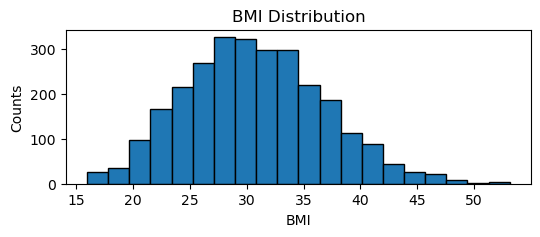

In [1206]:
plt.figure(figsize=(6,2))
plt.title("BMI Distribution")
plt.ylabel("Counts")
plt.xlabel("BMI")
plt.hist(df["BMI"], bins=20, edgecolor="black")

(array([347., 120., 118., 176., 114., 110., 162., 100., 102., 104., 164.,
        118., 122., 172., 122., 118., 162., 104.,  92., 140.]),
 array([18. , 20.3, 22.6, 24.9, 27.2, 29.5, 31.8, 34.1, 36.4, 38.7, 41. ,
        43.3, 45.6, 47.9, 50.2, 52.5, 54.8, 57.1, 59.4, 61.7, 64. ]),
 <BarContainer object of 20 artists>)

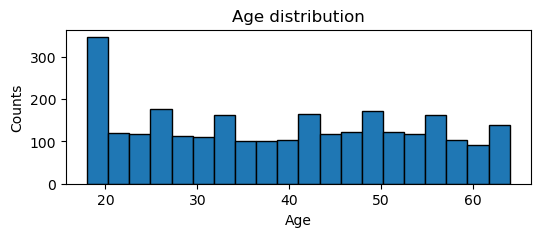

In [1208]:
plt.figure(figsize=(6,2))
plt.title("Age distribution")
plt.ylabel("Counts")
plt.xlabel("Age")
plt.hist(df["Age"], bins=20, edgecolor="black")

Text(0.5, 0, '')

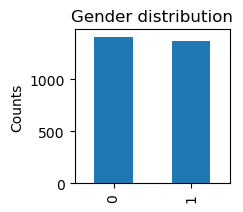

In [1209]:
plt.figure(figsize=(2,2))
plt.title("Gender distribution")
plt.ylabel("Counts")
df["Gender"].value_counts().plot.bar()
plt.xlabel("")

Text(0.5, 0, '')

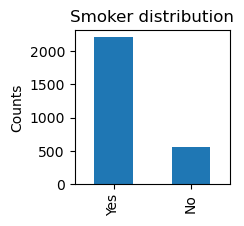

In [1211]:
plt.figure(figsize=(2,2))
plt.title("Smoker distribution")
plt.ylabel("Counts")
df["Smoker"].value_counts().plot.bar()
plt.xlabel("")

The distribution of smokers and non-smokers is uneven, which may affect later analysis when creating prediction models, especially if the dataset is not properly split into training and test sets.

Checking the dependencies between the individual features and the target feature = charges.

<Axes: xlabel='Smoker', ylabel='Charges'>

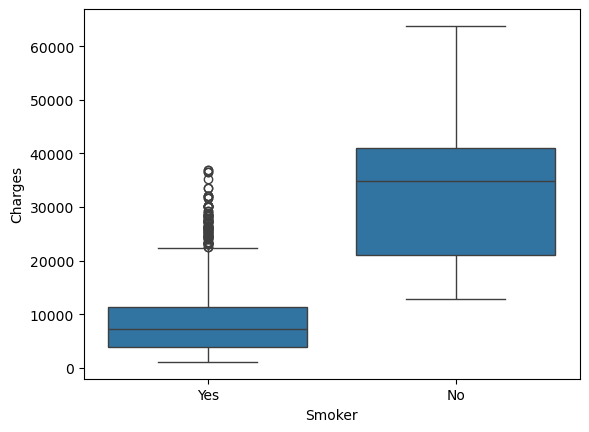

In [1216]:
sns.boxplot(x="Smoker", y="Charges", data=df)

<Axes: title={'center': 'Boxplot showing the distribution of charges by gender'}, xlabel='Gender', ylabel='Charges'>

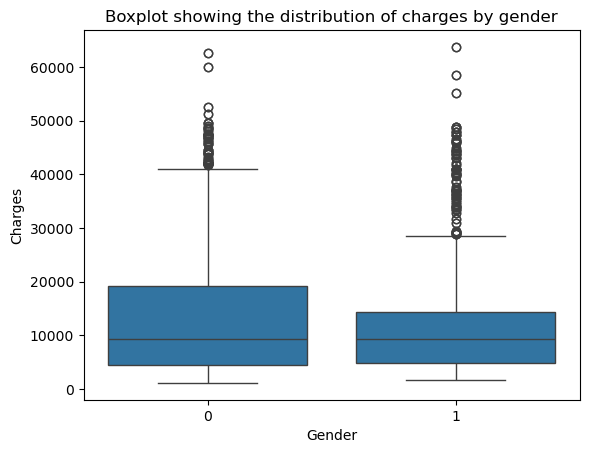

In [1217]:
plt.title("Boxplot showing the distribution of charges by gender")
sns.boxplot(x="Gender", y="Charges", data=df)

<Axes: title={'center': 'Boxplot showing the distribution of charges by age including smoking'}, xlabel='Age', ylabel='Charges'>

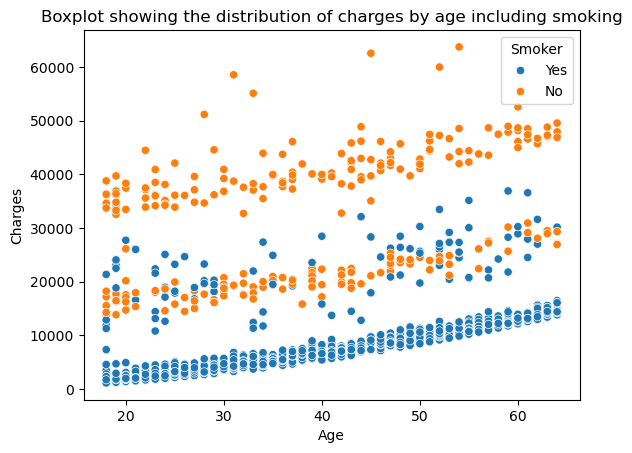

In [1218]:
plt.title("Boxplot showing the distribution of charges by age including smoking")
sns.scatterplot(x="Age", y="Charges", data=df, hue="Smoker")

<Axes: title={'center': 'Scatter plot showing the relationship between BMI and charges, including smoking status.'}, xlabel='BMI', ylabel='Charges'>

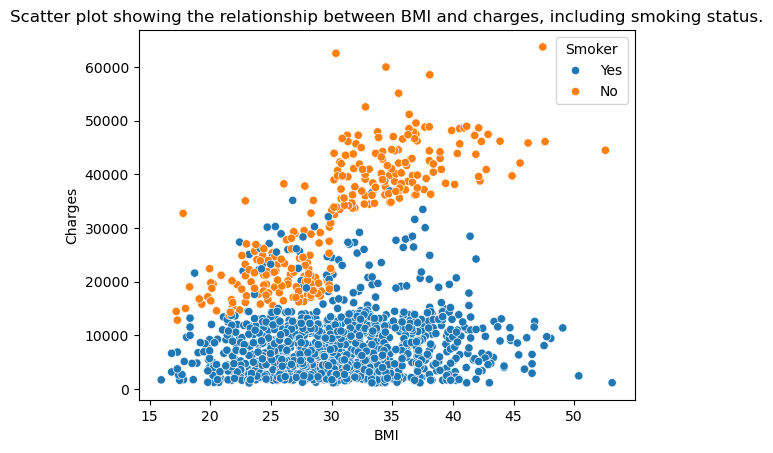

In [1220]:
plt.title("Scatter plot showing the relationship between BMI and charges, including smoking status.")
sns.scatterplot(x="BMI", y="Charges", data=df, hue="Smoker")

<p font-size : "18px";> It can be noticed that charges depend lineary on age and there is  a split between smokers and non-smokers. Let's investigate deeper. </p> 

<Axes: title={'center': 'Age vs. charges for smokers'}, xlabel='Age', ylabel='Charges'>

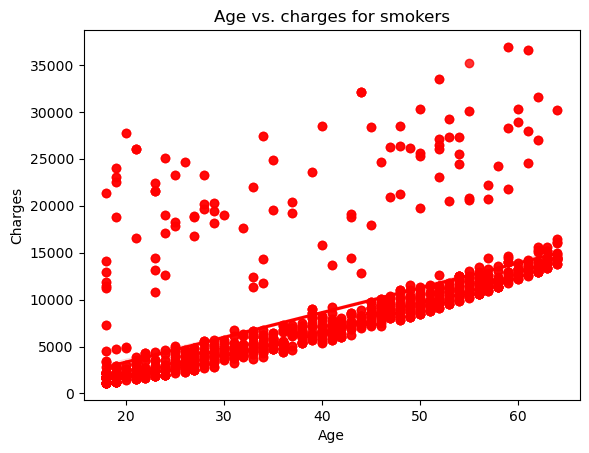

In [1224]:
df_smoker=df[df["Smoker"]=="Yes"]
plt.title("Age vs. charges for smokers")
sns.regplot(x="Age", y="Charges", data=df_smoker, color="red")

<p font-size : "18px";> It can be noticed that in case on smokers the dependency between charges and age is mostly linear.  </p>

<Axes: title={'center': 'BMI vs. charges for smokers'}, xlabel='BMI', ylabel='Charges'>

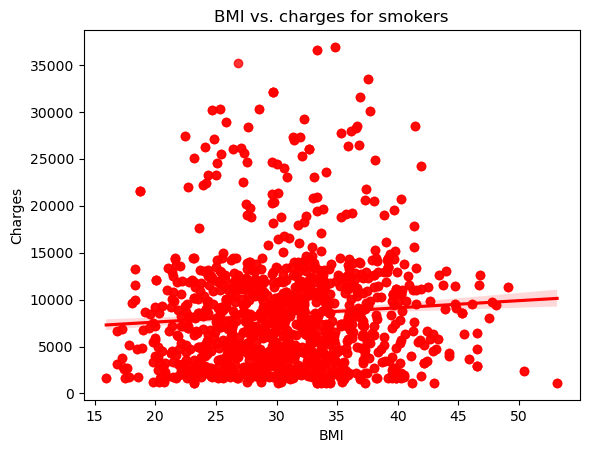

In [1227]:
plt.title("BMI vs. charges for smokers")
sns.regplot(x="BMI", y="Charges", data=df_smoker, color="red")

n the case of BMI, there is no clear relationship between the height of charges.

<Axes: title={'center': 'Age vs. charges for non-smokers'}, xlabel='Age', ylabel='Charges'>

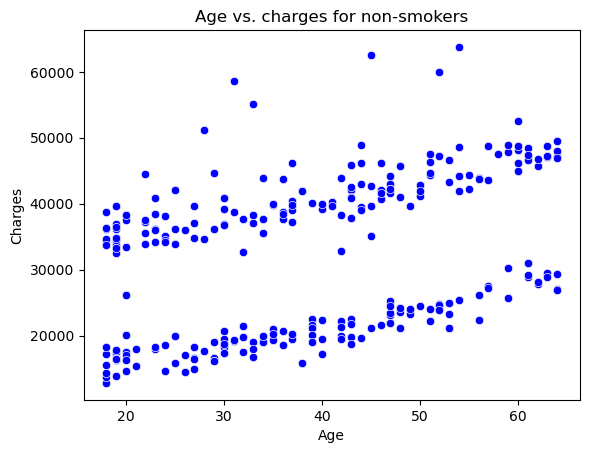

In [1229]:
df_no_smoker=df[df["Smoker"]=="No"]
plt.title("Age vs. charges for non-smokers")
sns.scatterplot(x="Age", y="Charges", data=df_no_smoker, color="blue")

<p font-size: "18px";> In case of non-smokers it is evident that the charges increase with age. Two independent relations can be seen. I will try to find out what they depend on. </p>

In [1231]:
bins_bmi= [0, 18.5, 24.9, 29.9, float('inf')]
group_bmi = ["Underweight", "Normal_weight", "Overweight", "Obesity"]
df_no_smoker = df_no_smoker.copy()
df_no_smoker["bmi_binned"] = pd.cut(df_no_smoker["BMI"], bins=bins_bmi, labels=group_bmi)

<Axes: title={'center': 'Age vs. charges for non-smokers'}, xlabel='Age', ylabel='Charges'>

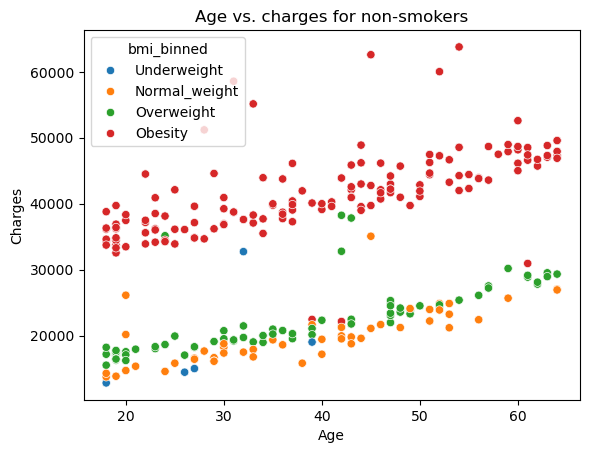

In [1236]:
plt.title("Age vs. charges for non-smokers")
sns.scatterplot(x="Age", y="Charges", hue="bmi_binned", data=df_no_smoker, color="blue")

It can be observed that in the case of obese individuals, the amount of charges is significantly higher compared to the other cases. 

Let's try to analyze the plot by dividing the data based on the amount of charges.

<Axes: title={'center': 'Age vs. BMI for non-smokers'}, xlabel='Age', ylabel='BMI'>

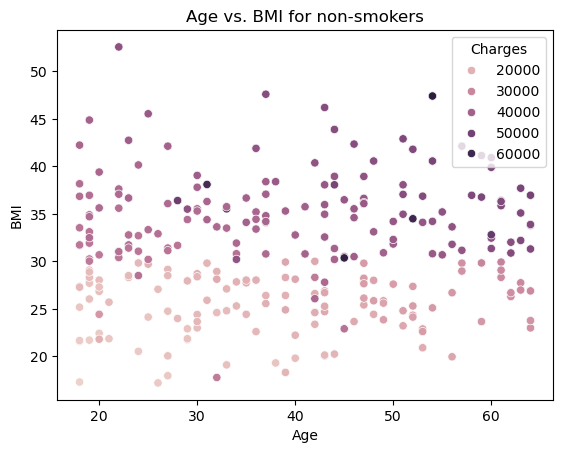

In [1240]:
df_no_smoker=df[df["Smoker"]=="No"]
plt.title("Age vs. BMI for non-smokers")
sns.scatterplot(x="Age", y="BMI", data=df_no_smoker, hue="Charges")

<p font-size:"18px";> It can be seen that in case of non-smokers the amount of charges depend both on age and BMI. I will devide data into categories depend on the level of charges. </p>


In [1249]:
bins= np.linspace(min(df_no_smoker["Charges"]), max(df_no_smoker["Charges"]), 6)
group_names = ["Very_Low", "Low", "Medium", "High", "Very_high"]
df_no_smoker = df_no_smoker.copy()
df_no_smoker.loc[:, "charges_binned"] = pd.cut(df_no_smoker["Charges"], bins=bins, labels=group_names)

In [1251]:
df_no_smoker

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges,Female,Male,No_smoker,Yes_smoker,NE,NW,SE,SW,charges_binned
10,62.0,1,26.29,0,No,2,27808.7251,0,1,1,0,0,0,1,0,Low
13,27.0,0,42.13,0,No,2,39611.7577,1,0,1,0,0,0,1,0,Medium
18,30.0,0,35.30,0,No,3,36837.4670,1,0,1,0,0,0,0,1,Medium
22,34.0,1,31.92,1,No,0,37701.8768,0,1,1,0,1,0,0,0,Medium
28,31.0,0,36.30,2,No,3,38711.0000,1,0,1,0,0,0,0,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,64.0,0,36.96,2,No,2,49577.6624,1,0,1,0,0,0,1,0,High
2743,32.0,0,33.63,1,No,0,37607.5277,1,0,1,0,1,0,0,0,Medium
2763,22.0,1,31.02,3,No,2,35595.5898,0,1,1,0,0,0,1,0,Medium
2764,47.0,0,36.08,1,No,2,42211.1382,1,0,1,0,0,0,1,0,Medium


<Axes: title={'center': 'Age vs. BMI for non-smokers with division into groups deneding on charges level'}, xlabel='Age', ylabel='BMI'>

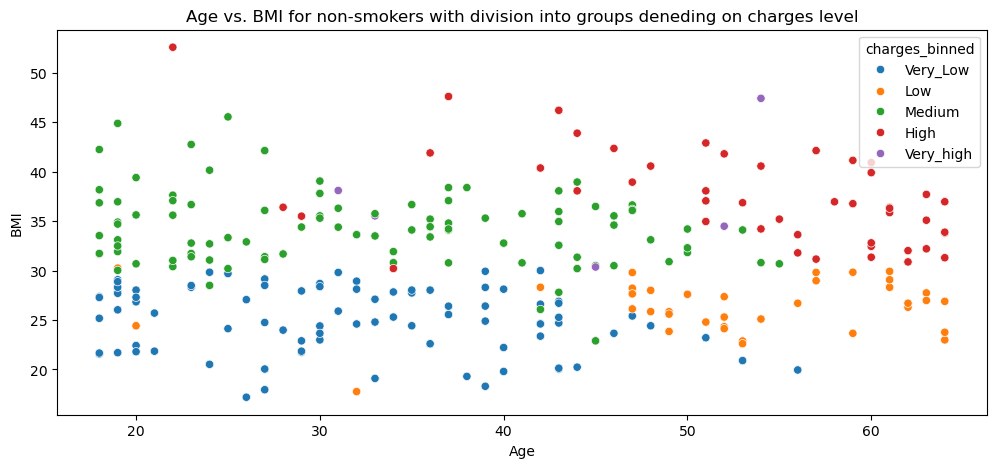

In [1253]:
plt.figure(figsize=(12,5))
plt.title("Age vs. BMI for non-smokers with division into groups deneding on charges level")
sns.scatterplot(x="Age", y="BMI", data=df_no_smoker, color="blue", hue="charges_binned")

<p font-size:"18px";> It can be seen that there are mainly 4 groups: 
<p></p>Very low charges :BMI<30 and age<47,</p>
<p></p>Low charges: BMI<30 and age>47, 
<p></p>Medium charges: BMI>30 and age<47,
<p></p>High charges: BMI>30 and age>47 </p>
<p></p> However no strong correlation can be seen in any of those groups. </p>

I will check if there is the same division in case of smokers

In [1261]:
bins2 = np.linspace(min(df_smoker["Charges"]), max(df_smoker["Charges"]),6)
group_names = ["Very_Low", "Low", "Medium", "High", "Very_high"]
df_no_smoker = df_no_smoker.copy()
df_smoker.loc[:, "charges_binned"]=pd.cut(df_smoker["Charges"], bins=bins2, labels=group_names)
df_smoker

,Age,Gender,BMI,No_of_children,Smoker,Region,Charges,Female,Male,No_smoker,Yes_smoker,NE,NW,SE,SW,charges_binned
0,18.0,0,33.770,1,Yes,2,1725.55230,1,0,0,1,0,0,1,0,Very_Low
1,28.0,0,33.000,3,Yes,2,4449.46200,1,0,0,1,0,0,1,0,Very_Low
2,33.0,0,22.705,0,Yes,1,21984.47061,1,0,0,1,0,1,0,0,Medium
3,32.0,0,28.880,0,Yes,1,3866.85520,1,0,0,1,0,1,0,0,Very_Low
5,46.0,1,33.440,1,Yes,2,8240.58960,0,1,0,1,0,0,1,0,Very_Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,18.0,0,23.320,1,Yes,2,1711.02680,1,0,0,1,0,0,1,0,Very_Low
2766,47.0,1,45.320,1,Yes,2,8569.86180,0,1,0,1,0,0,1,0,Low
2767,21.0,1,34.600,0,Yes,3,2020.17700,0,1,0,1,0,0,0,1,Very_Low
2769,23.0,0,18.715,0,Yes,1,21595.38229,1,0,0,1,0,1,0,0,Medium


<Axes: title={'center': 'Age vs. charges for smokers'}, xlabel='Age', ylabel='BMI'>

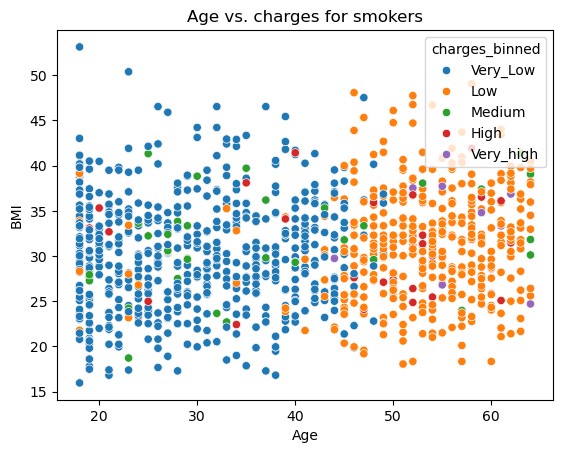

In [1263]:
plt.title("Age vs. charges for smokers")
sns.scatterplot(x="Age", y="BMI", data=df_smoker, color="red", hue="charges_binned")

<p font-size:"18px";> In case of smokers two main groups can be noticed: <42 years old with very low charges and >42 with low charges. Other point seems to be independent of age. They may depend on other factor not included in this dataset </p>

### Spliting data into train and test sets

<p font-size:"18px";> My target data are charges. </p>

In [1271]:
y_data = df["Charges"]
x_data = df.drop(columns=["Charges"])
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=x_data["Yes_smoker"])

### Checking for duplicates

In [1274]:
x_train.shape

(2216, 14)

In [1276]:
x_train.duplicated().sum()

926

In [1278]:
x_train = x_train.drop_duplicates()
x_train

,Age,Gender,BMI,No_of_children,Smoker,Region,Female,Male,No_smoker,Yes_smoker,NE,NW,SE,SW
998,36.0,1,26.885,0,Yes,1,0,1,0,1,0,1,0,0
1654,49.0,0,25.840,1,Yes,0,1,0,0,1,1,0,0,0
1316,18.0,0,53.130,0,Yes,2,1,0,0,1,0,0,1,0
1750,49.0,1,30.780,1,Yes,0,0,1,0,1,1,0,0,0
2539,48.0,1,27.930,4,Yes,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,26.0,0,23.700,2,Yes,3,1,0,0,1,0,0,0,1
1641,56.0,0,33.630,0,No,1,1,0,1,0,0,1,0,0
2562,40.0,1,27.400,1,Yes,3,0,1,0,1,0,0,0,1
2571,20.0,0,35.625,3,No,1,1,0,1,0,0,1,0,0


In [1279]:
y_train = y_train[x_train.index]
y_train.shape

(1290,)

### Replacing missing values

In [1283]:
x_train.isna().sum()

Age               2
Gender            0
BMI               0
No_of_children    0
Smoker            5
Region            0
Female            0
Male              0
No_smoker         0
Yes_smoker        0
NE                0
NW                0
SE                0
SW                0
dtype: int64

In [1285]:
y_train.isna().sum()

0

<p> In the case of age, the distribution is skewed towards the young. It does not resemble a normal distribution and I will therefore fill in the missing values with the median value </p> 

In [1296]:
imput_num = SimpleImputer(strategy="median")
x_train[["Age"]] = imput_num.fit_transform(x_train[["Age"]])

<p> In the case of smoker column I will fill the missing values with moda. </p> 

In [1299]:
imput_cat = SimpleImputer(strategy="most_frequent")
x_train[["Smoker"]] = imput_cat.fit_transform(x_train[["Smoker"]])

In [1301]:
x_train.isna().sum()

Age               0
Gender            0
BMI               0
No_of_children    0
Smoker            0
Region            0
Female            0
Male              0
No_smoker         0
Yes_smoker        0
NE                0
NW                0
SE                0
SW                0
dtype: int64

### Data scalling

<p> BMI has normal distribution and will be scalled using z-score and age will be scalled using min-max as the distribution is skewed. </p>

In [1305]:
scaler = StandardScaler()
x_train[["BMI"]] = scaler.fit_transform(x_train[["BMI"]])

<Axes: title={'center': 'Boxplot of scaled data in training set'}>

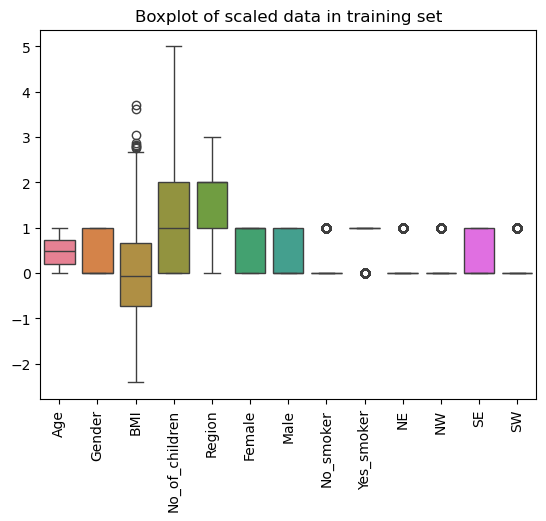

In [1307]:
scaler_mm = MinMaxScaler()
x_train[["Age"]] = scaler_mm.fit_transform(x_train[["Age"]])
plt.title("Boxplot of scaled data in training set")
plt.xticks(rotation=90)
sns.boxplot(data=x_train)

(array([514., 387., 121.,  84.,  33.,  58.,  56.,  31.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

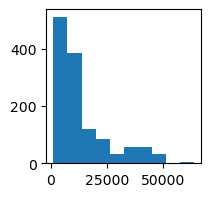

In [1309]:
plt.figure(figsize=(2,2))
plt.hist(y_train)

In [1311]:
y_train = scaler_mm.fit_transform(y_train.values.reshape(-1, 1))

<Axes: title={'center': 'Boxplot of scaled charges in training set'}>

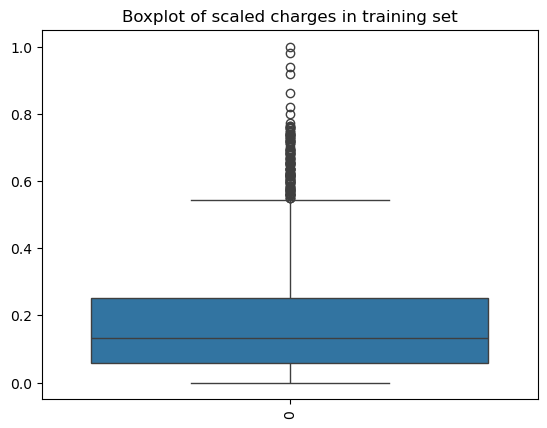

In [1313]:
plt.xticks(rotation=90)
plt.title("Boxplot of scaled charges in training set")
sns.boxplot(data=y_train)

### Test set analysis

Checking for missing values and filling them based on training data.

In [1317]:
x_test.isna().sum()

Age               2
Gender            0
BMI               0
No_of_children    0
Smoker            2
Region            0
Female            0
Male              0
No_smoker         0
Yes_smoker        0
NE                0
NW                0
SE                0
SW                0
dtype: int64

In [1319]:
x_test[["Age"]] = imput_num.transform(x_test[["Age"]])

In [1321]:
x_test[["Smoker"]] = imput_cat.transform(x_test[["Smoker"]])

In [1323]:
x_test.isna().sum()

Age               0
Gender            0
BMI               0
No_of_children    0
Smoker            0
Region            0
Female            0
Male              0
No_smoker         0
Yes_smoker        0
NE                0
NW                0
SE                0
SW                0
dtype: int64

In [1324]:
y_test.isna().sum()

0

Test data scalling

In [1328]:
x_test.loc[:, ["BMI"]] = scaler.transform(x_test[["BMI"]])

In [1330]:
x_test[["Age"]] = scaler_mm.transform(x_test[["Age"]].values)

In [1332]:
y_test = scaler_mm.transform(y_test.values.reshape(-1, 1))

<Axes: >

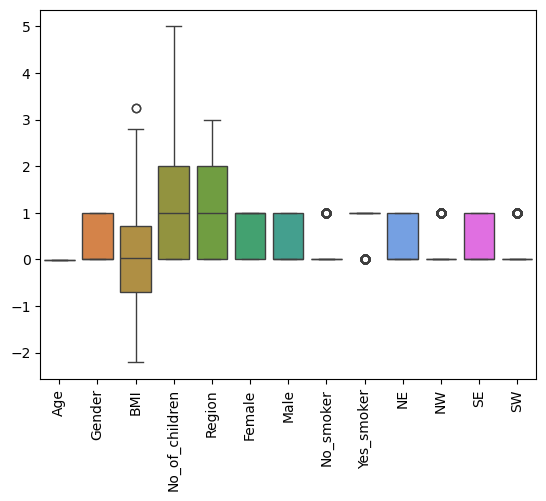

In [1334]:
plt.xticks(rotation=90)
sns.boxplot(data=x_test)

<Axes: >

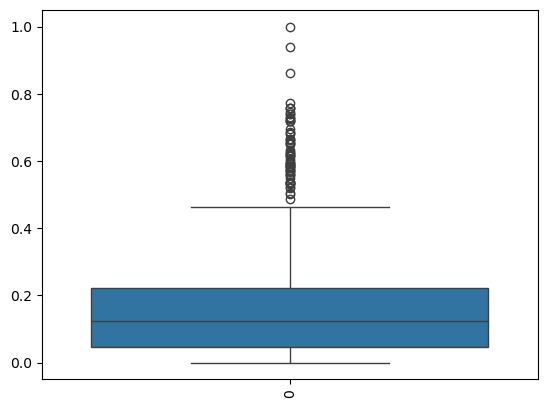

In [1336]:
plt.xticks(rotation=90)
sns.boxplot(data=y_test)

### Model development - linear regression

To begin with, I will create a linear regression model to predict the amount of charges based on one parameter: whether the person is a smoker or not.

In [1340]:
lm = LinearRegression()
X = x_train[["Yes_smoker"]]
lm.fit(X, y_train)

LinearRegression()

In [1342]:
lm.score(X, y_train)

0.6152744539319888

In [1344]:
y_test_pred = lm.predict(x_test[["Yes_smoker"]])
lm.score(x_test[["Yes_smoker"]], y_test)

0.596161938538555

The R-squared value for the training set is 0.61, and for the test set, it is 0.596. This indicates that the model explains about 61% of the variance in charges for the training data and about 59.6% for the test data. While the model shows a moderate level of explanatory power, there is still room for improvement. The slight decrease in performance on the test set suggests some overfitting, meaning the model may have learned patterns that are specific to the training data but do not generalize as well to the test data. Further improvements can be made by incorporating additional features or refining the model.

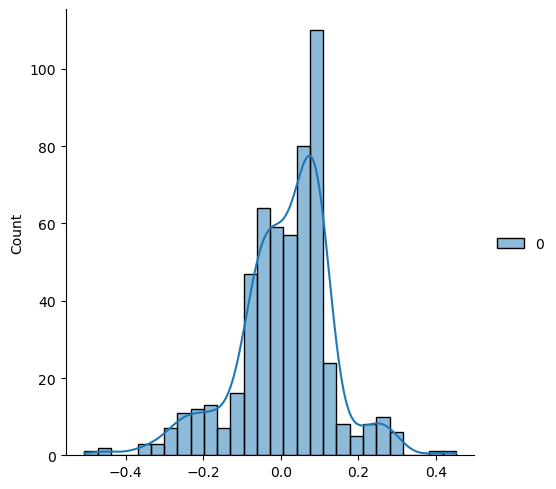

In [1347]:
sns.displot(y_test_pred-y_test, kde=True)

The plot shows the distribution of the residuals (the difference between the predicted values and the actual values for the test set). The KDE (Kernel Density Estimation) curve helps visualize the distribution shape of the residuals.

Multiple linear regression

Now, the same model but based on 3 parameters: age, bmi and smoking status.

In [1352]:
lm_m = LinearRegression()
X_train = x_train[["Yes_smoker", "Age", "BMI"]]
lm_m.fit(X_train, y_train)

LinearRegression()

In [1354]:
y_pred_m = lm_m.predict(X_train)
lm_m.score(X_train, y_train)

0.7396928910484849

In [1356]:
X_test = x_test[["Yes_smoker", "Age", "BMI"]]
y_test_pred_m = lm_m.predict(X_test)
lm_m.score(X_test, y_test)

0.4706555285831773

R² for the model with three parameters (Age, BMI, Smoker status):

R² for the training set is 0.739, while for the test set it is 0.47.

The model with additional features (Age, BMI, and Smoker status) explains about 73.9% of the variance in the training data, which is significantly better than the model with just one parameter (Smoker status).

However, the test set R² of 0.47 is much lower, indicating worse performance on unseen data and suggesting overfitting. The model is likely too closely fitted to the training data and doesn't generalize well.

Conclusions:

Adding features like Age and BMI improved the model's fit on the training data, as shown by the higher R² (0.739) compared to the model with one feature (0.61).

The large difference between the training (0.739) and test set (0.47) R² indicates poor generalization. The model is probably overfitting to the training data, making it perform poorly on new data.

I will use cross-validation and regularization to improve results.


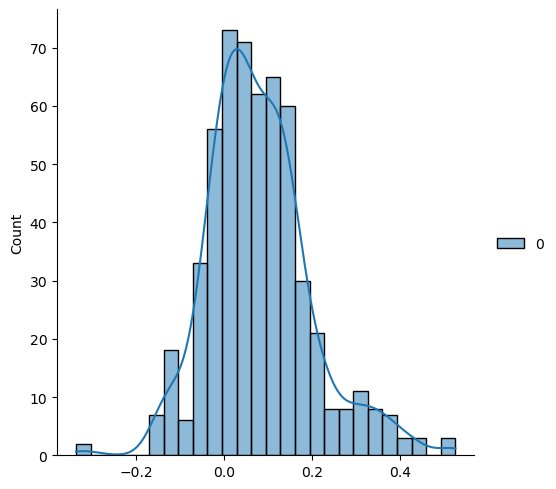

In [1359]:
sns.displot(y_test - y_test_pred_m, kde=True)

Ridge Regression & GridSearch

In [1362]:
RidgeModel = Ridge()
parameters=[{'alpha':[0.001, 0.05, 0.01, 0.5, 0.1, 1, 10, 100]}]
Grid_1 = GridSearchCV(RidgeModel, parameters, cv=4)
Grid_1.fit(X_train, y_train)
best_ridge = Grid_1.best_estimator_
best_ridge

Ridge(alpha=0.5)

In [1364]:
train_score = best_ridge.score(X_train, y_train)
train_score

0.7396877602017229

In [1366]:
test_score = beat_ridge.score(x_test[["Yes_smoker", "Age", "BMI"]], y_test)
test_score

0.46052850759320463

Despite applying cross-validation, the results did not improve significantly. The model with Ridge regression still showed a large gap between the training and test set performance. Specifically:

R² for the training set remained at 0.74.

R² for the test set remained at 0.46.

This indicates that the model is still overfitting to the training data and not generalizing well to unseen data.

To further improve the model, I attempted the same approach using all available featur

In [1371]:
lm_m2 = LinearRegression()
X_train_all = x_train[["Yes_smoker", "Age", "BMI", "Gender", "No_of_children", "Region"]]
lm_m.fit(X_train_all, y_train)

LinearRegression()

In [1373]:
y_pred_m = lm_m.predict(X_train_all)
lm_m.score(X_train_all, y_train)

0.7428494317378387

In [1375]:
X_test_all = x_test[["Yes_smoker", "Age", "BMI", "Gender", "No_of_children", "Region"]]
y_test_pred_m = lm_m.predict(X_test_all)
lm_m.score(X_test_all, y_test)

0.4838280333855137

In [1377]:
RidgeModel2 = Ridge()
parameters2=[{'alpha':[0.001, 0.05, 0.01, 0.5, 0.1, 1, 10, 100]}]
Grid_2 = GridSearchCV(RidgeModel2, parameters2, cv=4)
Grid_2.fit(X_train_all, y_train)
best_ridge2 = Grid_2.best_estimator_
best_ridge2

Ridge(alpha=0.5)

In [1379]:
train_score2 = best_ridge2.score(X_train_all, y_train)
train_score2

0.7428443133303602

In [1381]:
test_score2 = best_ridge2.score(X_test_all, y_test)
test_score2

0.48548320241791476

The inclusion of all features did not improve the model's predictions. An attempt will be made using a polynomial regression model instead.

### Model development - polynomial transformation

Creating polynomial features.

In [799]:
X=x_train[["Yes_smoker", "Age", "BMI"]]
pr = PolynomialFeatures(degree=2, include_bias=False)
x_train_pr = pr.fit_transform(X)

Fitting the model to new features.

In [802]:
lm.fit(x_train_pr, y_train)

LinearRegression()

Checking the model's performance on training data.

In [805]:
y_train_pred = lm.predict(x_train_pr)
train_score = lm.score(x_train_pr, y_train)
train_score

0.832854349609216

Transforming the test set and making predictions.

In [808]:
X_test = x_test[["Yes_smoker", "Age", "BMI"]]
x_test_pr = pr.transform(X_test)
y_test_pred = lm.predict(x_test_pr)
test_score = lm.score(x_test_pr, y_test)
test_score

0.588949438253416

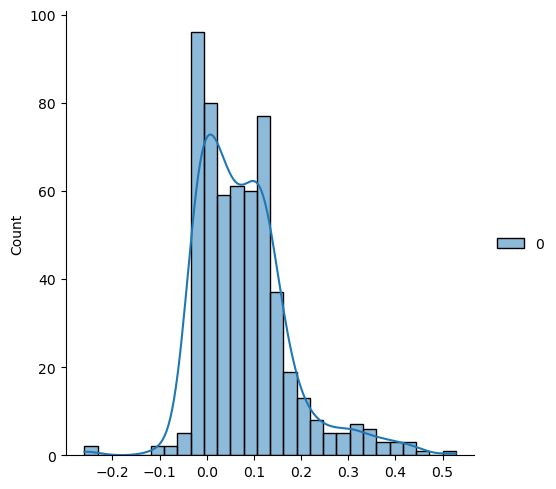

In [810]:
sns.displot(y_test-y_test_pred, kde=True)

# Model Refinement

## Ridge Regression

In [1388]:
RidgeModel3 = Ridge()
params = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 10, 100, 1000, 10000]}]
Grid3 = GridSearchCV(RidgeModel3, params, cv=5)
Grid3.fit(x_train_pr, y_train)
best_ridge3 = Grid3.best_estimator_
best_ridge3

Ridge(alpha=2)

In [1391]:
train_score3 = best_ridge3.score(x_train_pr, y_train)
train_score3

0.8327951736363562

In [1393]:
test_score3 = best_ridge3.score(x_test_pr, y_test)
test_score3

0.5969140843901407

Conclusions:

After applying the polynomial regression model, better results were obtained compared to previous linear models. The R² for the training set was 0.832, indicating that the model fits the training data well, explaining about 83.2% of its variance.

For the test set, the R² was 0.596, which is a significant improvement compared to the previous results. Although the model still performs worse on the test data than on the training data, it shows better generalization compared to earlier attempts. The polynomial regression model handles the test data better and does not exhibit as much overfitting as the linear models.

Overall Conclusions:

The polynomial model with feature engineering demonstrates better fit to the test data than linear models.

There is an improvement in generalization, suggesting the model performs better on unseen data.

The R² result for the test data (0.596) shows that the model can still be improved, but it already performs better than previous linear regression attempts.

Recommendations:

It may be worth adjusting the degree of the polynomial to achieve a better fit for the test data.

# Pipeline

In [918]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge2', Ridge())])
param_grid={
    "poly__degree":[2,3,4,5],
    "ridge2__alpha":[1, 5, 6, 7, 8, 9, 10, 15, 100]}

In [920]:
Grid2_p = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
Grid2_p.fit(X, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge2', Ridge())]),
             param_grid={'poly__degree': [2, 3, 4, 5],
                         'ridge2__alpha': [1, 5, 6, 7, 8, 9, 10, 15, 100]},
             scoring='r2')

In [921]:
best_model = Grid2_p.best_estimator_

In [924]:
Grid2_p.best_params_

{'poly__degree': 5, 'ridge2__alpha': 7}

In [926]:
train_score2 = best_model.score(X, y_train)
train_score2

0.8437108970694304

In [928]:
test_score2 = best_model.score(X_test, y_test)
test_score2

0.6153312376528614

# Conclusions:

After applying the pipeline with the best estimator having a polynomial degree of 5 and alpha of 7, the results show improvement in model performance. The R² for the training set is 0.84, indicating a strong fit to the training data, explaining 84% of the variance.

For the test set, the R² is 0.615, which is a notable improvement compared to previous models. The model performs better on the test data compared to earlier versions, suggesting that the polynomial features and regularization (alpha) have helped improve generalization and reduce overfitting.

Overall Conclusions:

The model with polynomial degree 5 and alpha 7 demonstrates better generalization on the test data than previous models.

The improvement in R² for the test data (0.615) suggests that the model is better at handling unseen data and is more robust than the earlier linear models or polynomial models without these adjustments.

The higher R² on the training data (0.84) reflects a good fit, but it's important to monitor for any remaining overfitting.